In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [39]:
data = pd.read_excel('lupa.xls')
p = data['p']
q = data['q']

In [40]:
data = data.drop(columns=['1/p','1/q', 'Error 1/q','f'])

In [41]:
data

p    q
0  117  121
1   97  106
2  127   96
3  137   91
4  162   86
5  107   96

In [14]:
errorq = 15.5
errorsobreq=((1/q)**2)* errorq

In [42]:
data['sobrep']=1/p
data['sobreq']=1/q
data['errorsobreq']= errorsobreq
data['f']= 1/(data['sobreq'] + data['sobrep'])

In [43]:
data['f'].mean()

54.377385743426174

## Ajuste para obtener $1/f$ de la ordenada al origen

In [13]:
def f(m,b,x):#si hago otra funcion le pongo los parametros correspondientes
    return(m*x+b)#pongo la funcion que vaya

In [14]:

popt,pcov = curve_fit(f,sobrep,sobreq,sigma=errorsobreq)

Ordenada al origen: 0.013582821975876532 ± 0.0037246770130324822
Pendiente -0.4575395986746027 ± 0.430233425887852


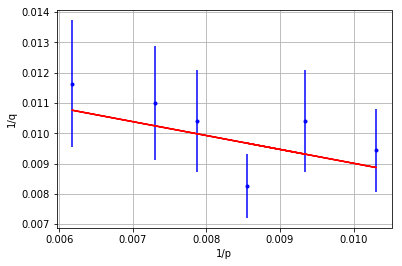

In [17]:
plt.errorbar(sobrep,sobreq,yerr = errorsobreq,color='b',fmt='.')
plt.plot(sobrep,f(popt[1],popt[0],sobrep),'r-')
plt.grid()
plt.xlabel('1/p')
plt.ylabel('1/q')
plt.title('')
sigmas = np.sqrt([pcov[0,0],pcov[1,1]])# las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
b=popt[0]
m=popt[1]
eb=sigmas[0]
em=sigmas[1]
print('Ordenada al origen: ' + str(b) + ' ± ' + str(eb))
print('Pendiente ' + str(m) + ' ± ' + str(em))

In [18]:
f=(1/m)
f

-2.1856031759803796

In [21]:
data.describe()

p           q          f       1/p       1/q  Error 1/q  \
count    6.000000    6.000000   6.000000  6.000000  6.000000        0.0   
mean   124.500000   99.333333  54.377386  0.008258  0.010191        NaN   
std     23.184046   12.516656   3.395315  0.001476  0.001191        NaN   
min     97.000000   86.000000  50.600985  0.006173  0.008264        NaN   
25%    109.500000   92.250000  51.655846  0.007443  0.009680        NaN   
50%    122.000000   96.000000  54.676235  0.008211  0.010417        NaN   
75%    134.500000  103.500000  55.803021  0.009146  0.010846        NaN   
max    162.000000  121.000000  59.483193  0.010309  0.011628        NaN   

         sobrep    sobreq  errorsobreq  
count  6.000000  6.000000     6.000000  
mean   0.008258  0.010191     0.001628  
std    0.001476  0.001191     0.000366  
min    0.006173  0.008264     0.001059  
25%    0.007443  0.009680     0.001455  
50%    0.008211  0.010417     0.001682  
75%    0.009146  0.010846     0.001824  
max    0.010309  0.011628     0.002096

In [25]:
del data['Error 1/q']

In [26]:
data.drop()

p    q          f    sobrep    sobreq  errorsobreq
0  117  121  59.483193  0.008547  0.008264     0.001059
1   97  106  50.650246  0.010309  0.009434     0.001379
2  127   96  54.672646  0.007874  0.010417     0.001682
3  137   91  54.679825  0.007299  0.010989     0.001872
4  162   86  56.177419  0.006173  0.011628     0.002096
5  107   96  50.600985  0.009346  0.010417     0.001682